In [41]:
import numpy as np
from scipy.optimize import rosen, rosen_der
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pylab as plt



In [47]:
def grad_descent_mult(df,x_prev,learn_rate):
    
    epsilon = 0.001
    grad_itter = 1
    
    seq_x = []
    seq_y = []

    seq_x = np.append(seq_x, x_prev[0])
    seq_y = np.append(seq_y, x_prev[1])

    x_next = np.subtract(x_prev, learn_rate*df(x_prev))
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    
    while np.linalg.norm(np.subtract(x_next,x_prev)) > epsilon and grad_itter < 1000:

        x_prev = x_next
        x_next = np.subtract(x_prev, learn_rate*df(x_prev))
        grad_itter += 1
        
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])

    return (seq_x,seq_y)

In [48]:
def adam_mult(df, x, learn_rate, beta1, beta2, eps=1e-8):

	tolerance = 0.001
	itters = 1000

	seq_x = []
	seq_y = []

	seq_x = np.append(seq_x, x[0])
	seq_y = np.append(seq_y, x[1])

	m = 0
	v = 0
	for t in range(itters):
		g = df(x)
		m = beta1 * m + (1.0 - beta1) * g
		v = beta2 * v + (1.0 - beta2) * g**2
		mhat = m / (1.0 - beta1**(t + 1))
		vhat = v / (1.0 - beta2**(t + 1))
		
		x = x - learn_rate * mhat / (np.sqrt(vhat) + eps)

		if np.mean(np.abs(mhat / (np.sqrt(vhat) + eps))) < tolerance:
			break        	

		seq_x = np.append(seq_x, x[0])
		seq_y = np.append(seq_y, x[1])
	
	return (seq_x,seq_y)


In [49]:
x1, y1 = grad_descent_mult(rosen_der, [-4.5, -4], 1e-5)
x2, y2 = adam_mult(rosen_der, [-4.5, -4], 1e-2, 0.9, 0.999)

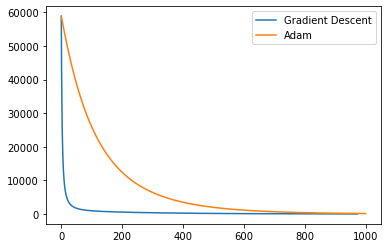

In [50]:
plt.plot(rosen([ x1, y1]), label='Gradient Descent')
plt.plot(rosen([ x2, y2]), label='Adam')
plt.legend()

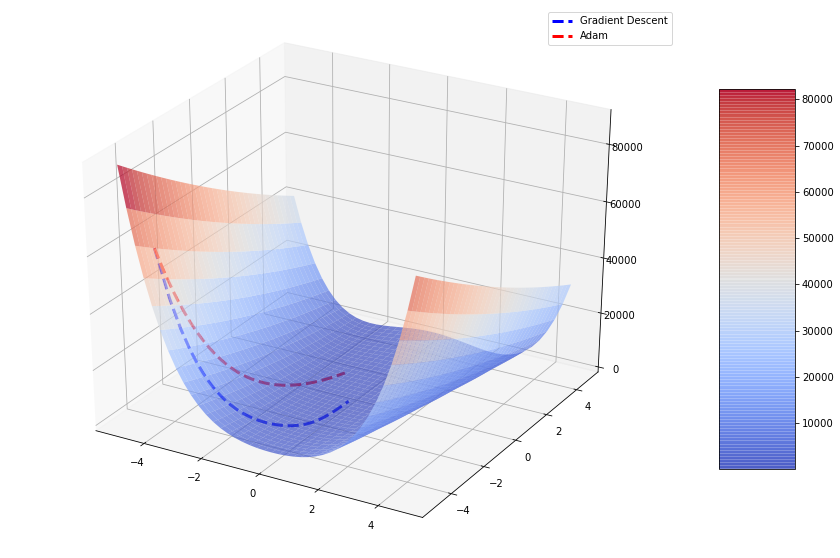

In [46]:

#plot function
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = rosen([X,Y])

fig = plt.figure(1, figsize = (15, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.coolwarm, alpha=0.7)
ax.plot(x1, y1, '--b', zs = rosen([ x1, y1]), lw=3, label='Gradient Descent')
ax.plot(x2, y2, '--r', zs = rosen([ x2, y2]), lw=3, label='Adam',)


fig.colorbar(surf, shrink = 0.7, aspect=5)
plt.legend()
plt.show()